<a href="https://colab.research.google.com/github/massinoLight/Tp_MFBD/blob/main/Tp3_AlgoBD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
np.set_printoptions(threshold=np.inf, linewidth=np.nan)
import pandas as pd 
import warnings 
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore') 

In [2]:
!wget -P /content/sample_data https://raw.githubusercontent.com/elki-project/elki/master/data/synthetic/Vorlesung/mouse.csv

--2021-11-04 10:28:33--  https://raw.githubusercontent.com/elki-project/elki/master/data/synthetic/Vorlesung/mouse.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24564 (24K) [text/plain]
Saving to: ‘/content/sample_data/mouse.csv’

mouse.csv           100%[===================>]  23.99K  --.-KB/s    in 0.001s  

2021-11-04 10:28:33 (17.5 MB/s) - ‘/content/sample_data/mouse.csv’ saved [24564/24564]



In [7]:
mouse = pd.read_csv('/content/sample_data/mouse.csv',sep=';')
mouse

,########################################################
0,## Number of clusters: 4
1,##############################################...
2,## Cluster: Head
3,##############################################...
4,## Size: 290
...,...
543,0.15150612475114178 0.8765856628207388 Noise
544,0.8603082847506063 0.6338333996208041 Noise
545,0.8620825903226392 0.5918053842487218 Noise
546,0.9160298083819269 0.523390593285425 Noise


In [13]:
import csv
file = open('/content/sample_data/mouse.csv')

csvreader = csv.reader(file)
rows = []
for row in csvreader:
        rows.append(row)
rows

[['########################################################'],
 ['## Number of clusters: 4'],
 ['########################################################'],
 ['## Cluster: Head'],
 ['########################################################'],
 ['## Size: 290'],
 ['## Clipping: [0.00000000 0.00000000] - [1.00000000 1.00000000]'],
 ['## Density correction factor: 1.0'],
 ['## Generators:'],
 ['##   Normal Distribution (mean=0.5', ' stddev=0.2)'],
 ['##   Normal Distribution (mean=0.5', ' stddev=0.2)'],
 ['## Discards: 203 Retries left: 986'],
 ['## Density correction factor estimation: 1.1789181692094313'],
 ['########################################################'],
 ['0.45660137634625386 0.43280640922410835 Head'],
 ['0.6113784672224188 0.5286245988894975 Head'],
 ['0.45029897412145387 0.7116061205092745 Head'],
 ['0.6390150501606866 0.46074398219372076 Head'],
 ['0.6289567839292338 0.32346951478531516 Head'],
 ['0.5662104392361843 0.289357728041304 Head'],
 ['0.5676530359179894 0.29

In [28]:
df=[]
j=0
for i in range(14,len(rows)):
  if rows[i]==rows[0]:
    break
  else:
    df.append(rows[i])

 
for j in range(i+12,len(rows)):
  if rows[j]==rows[0]:
    break
  else:
    df.append(rows[j])

for k in range(j+12,len(rows)):
  if rows[k]==rows[0]:
    break
  else:
    df.append(rows[k])

for l in range(k+12,len(rows)):
  if rows[l]==rows[0]:
    break
  else:
    df.append(rows[l]) 

    


In [29]:
df   

[['0.45660137634625386 0.43280640922410835 Head'],
 ['0.6113784672224188 0.5286245988894975 Head'],
 ['0.45029897412145387 0.7116061205092745 Head'],
 ['0.6390150501606866 0.46074398219372076 Head'],
 ['0.6289567839292338 0.32346951478531516 Head'],
 ['0.5662104392361843 0.289357728041304 Head'],
 ['0.5676530359179894 0.29547265797376954 Head'],
 ['0.43602399117606827 0.4157757274892156 Head'],
 ['0.5454137939219365 0.36750178191490135 Head'],
 ['0.4394528077596546 0.5478674292772121 Head'],
 ['0.512200437106122 0.500864646508404 Head'],
 ['0.3917587782134365 0.6103473035285875 Head'],
 ['0.5218570283765972 0.5769060811333763 Head'],
 ['0.7194189575585879 0.43648093863144677 Head'],
 ['0.2995329322777752 0.6230627270405613 Head'],
 ['0.4982241475102956 0.42839983794125985 Head'],
 ['0.2740522921447801 0.4804320598631085 Head'],
 ['0.38284021717487404 0.5440688862962566 Head'],
 ['0.4249231989421871 0.284825727537369 Head'],
 ['0.5207238207675212 0.32542733595644696 Head'],
 ['0.4432955

In [44]:
l1=[]
l2=[]
l3=[]
df[1][0].split()[0]
for i in range(0,len(df)):
  l1.append(float(df[i][0].split()[0]))
  l2.append(float(df[i][0].split()[1]))
  l3.append(df[i][0].split()[2])


# notre DATA set est bien nettoyé et les valeurs au bon format 

In [68]:

db = pd.DataFrame(list(zip(l1, l2,l3)))
db
dbf = pd.DataFrame(list(zip(l1, l2)))
dbf

,0,1
0,0.456601,0.432806
1,0.611378,0.528625
2,0.450299,0.711606
3,0.639015,0.460744
4,0.628957,0.323470
...,...,...
494,0.151506,0.876586
495,0.860308,0.633833
496,0.862083,0.591805
497,0.916030,0.523391


In [116]:
z=[]
for i in range(0,len(dbf)):
  if l3[i]=='Noise':
    z.append(-1)
  else:
    z.append(1) 
z

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


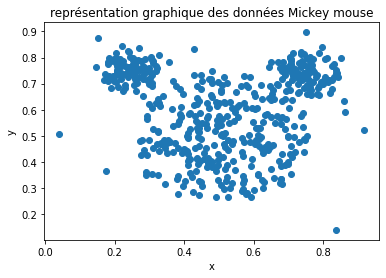

In [114]:

X=db[0]
Y=db[1]

plt.scatter(X,Y)

plt.title('représentation graphique des données Mickey mouse')
plt.xlabel('x')
plt.ylabel('y')

#plt.savefig('ScatterPlot_01.png')
plt.show()

**Isolation forest:** Cet algorithme non supervisé de machine learning permet de  détecter des anomalies dans un jeu de données. Il isole les données atypiques, autrement dit celles qui sont trop différentes de la plupart des autres données

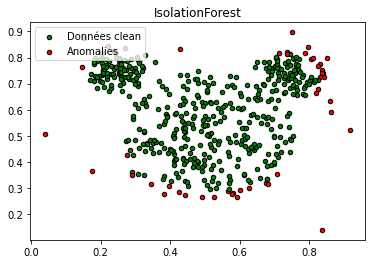

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

matrix_data = np.array(dbf)
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
clf.fit(matrix_data)
d=clf.decision_function(matrix_data)
f=clf.predict(matrix_data)
for i in range(0,len(f)):
  if f[i]<0:
    c = plt.scatter(matrix_data[i, 0], matrix_data[i, 1], c="red", s=20, edgecolor="k")
  else:
    b2 = plt.scatter(matrix_data[i, 0], matrix_data[i, 1], c="green", s=20, edgecolor="k")

plt.title("IsolationForest")



plt.legend(
    [ b2, c],
    ["Données clean", "Anomalies"],
    loc="upper left",
)
plt.show()



**Précision du modéle**

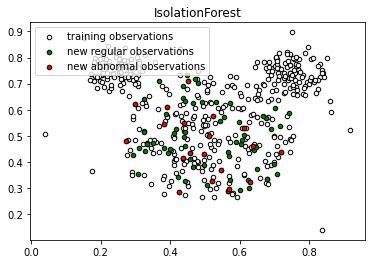

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

matrix_data = np.array(dbf)

X_train = matrix_data[80:,:]


X_test =   matrix_data[:80,:]
X_outliers = matrix_data[:20,:]

# fit the model
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")


b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=20, edgecolor="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="green", s=20, edgecolor="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="red", s=20, edgecolor="k")

plt.legend(
    [b1, b2, c],
    ["training observations", "new regular observations", "new abnormal observations"],
    loc="upper left",
)
plt.show()